In [1]:
import sys
import os

print(sys.executable)
print(os.getcwd())
os.chdir("C:\\Users\\Christine\\PycharmProjects\\test\\")
print(os.getcwd())

C:\Users\Christine\AppData\Local\Programs\Python\Python35-32\python.exe
C:\Users\Christine\PycharmProjects\test
C:\Users\Christine\PycharmProjects\test


In [2]:
import pandas as pd
police_killings = pd.read_csv("police_killings.csv", encoding = "ISO-8859-1")
print(police_killings.head())

                 name age gender    raceethnicity     month  day  year  \
0  A'donte Washington  16   Male            Black  February   23  2015   
1      Aaron Rutledge  27   Male            White     April    2  2015   
2         Aaron Siler  26   Male            White     March   14  2015   
3        Aaron Valdez  25   Male  Hispanic/Latino     March   11  2015   
4        Adam Jovicic  29   Male            White     March   19  2015   

            streetaddress          city state     ...      p_income  h_income  \
0            Clearview Ln     Millbrook    AL     ...         28375   51367.0   
1  300 block Iris Park Dr     Pineville    LA     ...         14678   27972.0   
2    22nd Ave and 56th St       Kenosha    WI     ...         25286   45365.0   
3       3000 Seminole Ave    South Gate    CA     ...         17194   48295.0   
4          364 Hiwood Ave  Munroe Falls    OH     ...         33954   68785.0   

   county_income  comp_income  county_bucket  nat_bucket   pov     u

In [3]:
print(police_killings.columns)

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college', 'Unnamed: 34'],
      dtype='object')


In [4]:
print(police_killings["raceethnicity"].value_counts())

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64


Index(['White', 'Black', 'Hispanic/Latino', 'Unknown',
       'Asian/Pacific Islander', 'Native American'],
      dtype='object')


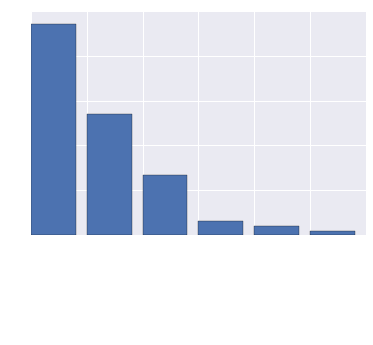

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

counts = police_killings["raceethnicity"].value_counts()
print(counts.index)

# plt.bar(location of bars, what to be shown)
plt.bar(range(6), counts)
# plt.xticks(location of ticks, labels of the ticks, rotation?, color)
plt.xticks(range(6), counts.index, rotation="vertical", color = "white")
plt.yticks(color = "white")
plt.show()

Most of them are Whites. Then black. Does it has something to do with the percentage of each race in the US population?


In [6]:
ethicity_ratio = counts/sum(counts)
print(ethicity_ratio)

White                     0.505353
Black                     0.289079
Hispanic/Latino           0.143469
Unknown                   0.032120
Asian/Pacific Islander    0.021413
Native American           0.008565
Name: raceethnicity, dtype: float64


Racial breakdown
It looks like people identified as Black are far overrepresented in the shootings versus in the population of the US (28% vs 16%). You can see the breakdown of population by race on wikipedia.
People identified as Hispanic appear to be killed about as often as random chance would account for (14% of the people killed as Hispanic, versus 17% of the overall population).
Whites are underrepresented among shooting victims vs their population percentage, as are Asians.

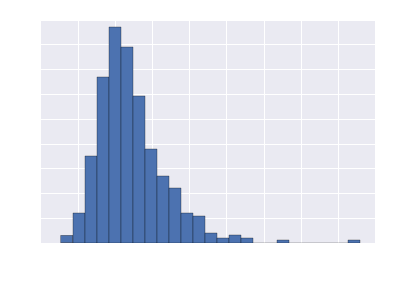

In [7]:
# with higher bins, you will get more bars. (granular result)
police_killings["p_income"][police_killings["p_income"] != "-"].astype(int).hist(bins=25)
plt.xticks(color ="white")
plt.yticks(color ="white")
plt.xlabel("dollars", color = "white")
plt.ylabel("counts", color = "white")
plt.title("median personal income by census area", color = "white")

Income breakdown
According to the Census, median personal income in the US is 28,567, and our median is 22,348, which means that shootings tend to happen in less affluent areas. Our sample size is relatively small, though, so it's hard to make sweeping conclusions.

In [8]:
state_pop = pd.read_csv("population.csv")

In [9]:
count = police_killings["state_fp"].value_counts()

In [10]:
# Create a new Dataframe called states. One column should be called STATE, and will contain the index of counts. 
# The other column should be called shootings, and will contains the values from counts
states = pd.DataFrame({"STATE": count.index, "shooting": count})

In [11]:
# Use the merge() method to merge state_pop and states
# Pass the on keyword argument, with the value set to STATE. 
# STATE is the common column that both states and state_pop share.
states = states.merge(state_pop, on="STATE")

In [13]:
states["pop_millions"] = states["POPESTIMATE2015"] / 1000000
states["rate"] = states["shooting"]/states["pop_millions"]

states.sort_values(by="rate")
print(states)

    STATE  shooting  SUMLEV REGION DIVISION                  NAME  \
0       6        74      40      4        9            California   
1      48        47      40      3        7                 Texas   
2      12        29      40      3        5               Florida   
3       4        25      40      4        8               Arizona   
4      40        22      40      3        7              Oklahoma   
5      13        16      40      3        5               Georgia   
6      36        13      40      1        2              New York   
7       8        12      40      4        8              Colorado   
8      34        11      40      1        2            New Jersey   
9      53        11      40      4        9            Washington   
10     22        11      40      3        7             Louisiana   
11     17        11      40      2        3              Illinois   
12     39        10      40      2        3                  Ohio   
13     29        10      40      2


Killings by state
States in the midwest and south seem to have the highest police killing rates, whereas those in the northeast seem to have the lowest

In [56]:
pk = police_killings[(police_killings["share_white"] != "-") & (police_killings["share_black"] != "-") & 
    (police_killings["share_hispanic"] != "-")]


pk["share_white"] = pk["share_white"].astype(float)
pk["share_black"] = pk["share_black"].astype(float)
pk["share_hispanic"] = pk["share_hispanic"].astype(float)

C:\Users\Christine\AppData\Local\Programs\Python\Python35-32\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Christine\AppData\Local\Programs\Python\Python35-32\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Christine\AppData\Local\Programs\Python\Python35-32\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [58]:
police_killings["state"].value_counts()

CA    74
TX    46
FL    29
AZ    25
OK    22
GA    16
NY    14
CO    12
LA    11
NJ    11
WA    11
IL    11
NC    10
MO    10
MD    10
OH    10
VA     9
SC     9
MI     9
IN     8
OR     8
AL     8
PA     7
KY     7
NE     6
MN     6
MS     6
KS     6
TN     6
UT     5
MA     5
WI     5
NM     5
HI     4
ID     4
AR     4
NV     3
MT     2
WV     2
AK     2
IA     2
DE     2
CT     1
NH     1
WY     1
DC     1
ME     1
Name: state, dtype: int64

In [60]:
lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

# use isin() to only select rows from police_killings where the state column is in the list.
ls = pk[pk["state"].isin(lowest_states)]
hs = pk[pk["state"].isin(highest_states)]

In [65]:
columns = ["pop", "county_income", "share_white", "share_black", "share_hispanic"]

print(ls[columns].mean())
print(hs[columns].mean())

pop                4201.660714
county_income     54830.839286
share_white          60.616071
share_black          21.257143
share_hispanic       12.948214
dtype: float64
pop                4315.750000
county_income     48706.967391
share_white          55.652174
share_black          11.532609
share_hispanic       20.693478
dtype: float64



State by state rates

It looks like the states with low rates of shootings tend to have a higher proportion of blacks in the population, and a lower proportion of hispanics in the census regions where the shootings occur. It looks like the income of the counties where the shootings occur is higher.
States with high rates of shootings tend to have high hispanic population shares in the counties where shootings occur.